In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
#load data
df = pd.read_csv(r"C:\Users\shijin kunju\Desktop\ironhack\week7\project_3\video_game_sales\data\raw\video_game_sales_final_cleaned.csv")

In [27]:
unique_ratings=df["rating_grouped"].unique()
unique_ratings

array(['Children', 'Unrated', 'Adults', 'Teens', 'Pre-teens', nan],
      dtype=object)

In [28]:
#count each rating
print("\nRating Counts:\n", df['rating_grouped'].value_counts())


Rating Counts:
 rating_grouped
Unrated      6683
Children     3929
Teens        2905
Adults       1537
Pre-teens    1393
Name: count, dtype: int64


In [29]:
#filter for binary classification
#to predict adults vs Children
df_binary = df[df['rating_grouped'].isin(['Adults', 'Children'])].copy()
df_binary['is_mature'] = (df_binary['rating_grouped'] == 'Adults').astype(int)


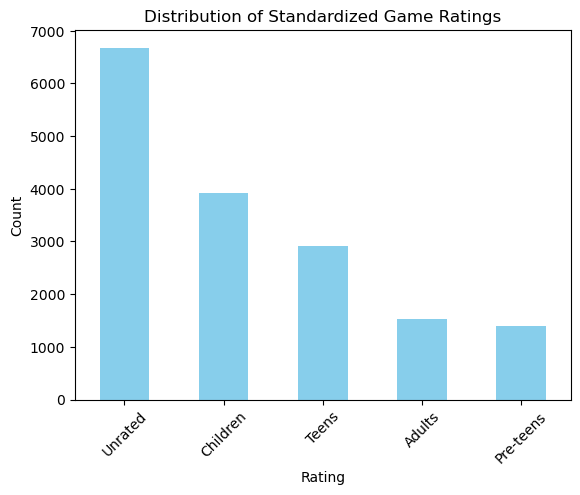

In [30]:
#visualize rating distribution
df['rating_grouped'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Standardized Game Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [32]:
# Select features - adjust based on your actual columns
features = ['genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'year_of_release']
X = df_binary[features]
y = df_binary['is_mature']

In [33]:

# Identify categorical and numerical features
categorical_features = ['genre', 'publisher']
numerical_features= ['na_sales','eu_sales','jp_sales','year_of_release']

In [34]:
# Split data (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Preserve class distribution
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set shape: (4372, 6)
Test set shape: (1094, 6)

Class distribution in training set:
is_mature
0    0.718893
1    0.281107
Name: proportion, dtype: float64


In [35]:
# Create preprocessing transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create pipeline with preprocessing and model
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [38]:
# Train and evaluate Logistic Regression
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy:{accuracy_score(y_test,y_pred_lr):.2f}")
print("\nClassification Report:")
print(classification_report(y_test ,y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_lr))

Logistic Regression Results:
Accuracy:0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       786
           1       0.77      0.88      0.82       308

    accuracy                           0.89      1094
   macro avg       0.86      0.89      0.87      1094
weighted avg       0.90      0.89      0.90      1094


Confusion Matrix:
[[707  79]
 [ 37 271]]


In [41]:
# Train and evaluate Random Forest(better for imbalanced data),The random forest uses class_weight='balanced' to account for imbalanced classes
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_rf))


Random Forest Results:
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       786
           1       0.86      0.89      0.87       308

    accuracy                           0.93      1094
   macro avg       0.91      0.91      0.91      1094
weighted avg       0.93      0.93      0.93      1094


Confusion Matrix:
[[740  46]
 [ 35 273]]


In [42]:
# Get feature names after one-hot encoding
cat_encoder = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat']
feature_names = numerical_features + list(cat_encoder.get_feature_names_out(categorical_features))


In [43]:

# Extract feature importances
importances = pipeline_rf.named_steps['classifier'].feature_importances_

In [44]:
# Create importance DataFrame,helps to identify which features most influence
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)


In [45]:
print("\nTop 10 Important Features:")
print(importance_df.head(10))


Top 10 Important Features:
            Feature  Importance
12    genre_shooter    0.142168
3   year_of_release    0.097731
1          eu_sales    0.091001
14     genre_sports    0.086285
4      genre_action    0.081904
0          na_sales    0.070729
10     genre_racing    0.040408
2          jp_sales    0.037441
8    genre_platform    0.030445
7        genre_misc    0.026861
